### Instalação de pacotes:

In [ ]:
!pip install tensorflow
!pip install opencv-python

### Importação de bibliotecas:

In [1]:
# Importação de bibliotecas:
import matplotlib.pyplot as pypt
import tensorflow as pytf
import shutil as pysh
import numpy as pynp
import cv2 as pycv
import os

from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from PIL import Image

### Data Augmentation com TensorFlow - Keras:

In [2]:
# Criando as pastas 'dataset' e 'augmented':
os.system('mkdir dataset');
os.system('mkdir augmented');

#### Instância da classe ImageDataGenerator:

In [30]:
# Construindo uma instância da classe ImageDataGenerator:
imagens_geradas = ImageDataGenerator(
                    # rotation_range = 90,
                    # width_shift_range = 0.2,
                    # height_shift_range = 0.2,
                    # shear_range = 0.2,
                    # preprocessing_function = minha_funcao,

                    brightness_range = [0.2, 1.2],                 # Variação do brilho entre 20% e 120%;
                    channel_shift_range = 20,                      # Variação de saturação entre 0 e 20 unidades;
                    zoom_range = [0.7, 1.0],                       # Variação do zoom entre 70% e 100%;
                    horizontal_flip = True,                        # Flip horizontal;
                    vertical_flip = True,                          # Flip vertical;
                    fill_mode = 'reflect')                         # Outros: nearest, constant, reflect, wrap.

#### Capturando um array de imagens a serem augmentadas:

In [31]:
# Lendo cada imagem [formato array] manualmente e usando o método flow para modificá-las:
diretorio_do_dataset = r'C:\Users\lucas\Documents\dataset';
dataset_array = [];

dataset = os.listdir(diretorio_do_dataset);

for aux in range(len(dataset)):
    # Captura apenas arquivos com extensão .JPG e incrementa na lista dataset_array:
    if (dataset[aux].split('.')[1] == 'JPG' or dataset[aux].split('.')[1] == 'jpg' or dataset[aux].split('.')[1] == 'png' or dataset[aux].split('.')[1] == 'PNG'):
        imagem = io.imread(diretorio_do_dataset + f'//{dataset[aux]}');
        imagem = Image.fromarray(imagem, 'RGB');
        dataset_array.append(pynp.array(imagem));

# Array de imagens [formato array]:
x = pynp.array(dataset_array);

#### Aferindo o array de imagens a serem augmentadas:

In [32]:
# Aferindo o shape da array formado:
print(f'- Serão augmentadas {x.shape[0]} imagens, com dimensões de {x.shape[1]} por {x.shape[2]} pixels e {x.shape[3]} canais.\n- Formato: {x.shape}.')

- Serão augmentadas 1 imagens, com dimensões de 450 por 450 pixels e 3 canais.
- Formato: (1, 450, 450, 3).


#### Método flow para gerar as imagens augmentadas:

In [33]:
# Variável auxiliar:
aux = 0;

# Iterações do método flow, gerando 4 novas imagens para cada imagem normal:
for batch in imagens_geradas.flow(x, batch_size=16,  
                            save_to_dir = r'C:\Users\lucas\Documents\augmented', 
                            save_prefix = 'aug', 
                            save_format = 'jpg'):
    aux += 1;

    # Break:
    if aux == 4:
        break;

#### Aferindo a quantidade de imagens augmentadas geradas:

In [34]:
dataset_count = 0;
dataset_aug = len(os.listdir(r'C:\Users\lucas\Documents\augmented'));

for aux in range(len(dataset)):
    # Captura apenas arquivos com extensão .JPG e incrementa dataset_count:
    if (dataset[aux].split('.')[1] == 'JPG' or dataset[aux].split('.')[1] == 'jpg' or dataset[aux].split('.')[1] == 'png' or dataset[aux].split('.')[1] == 'PNG'):
        dataset_count += 1;

print(f'- Imagens no diretório dataset: {dataset_count}');
print(f'- Imagens augmentadas: {dataset_aug}');

print(f'\n- Foram geradas {int(dataset_aug/dataset_count)} imagens augmentadas para cada imagem real.');

- Imagens no diretório dataset: 1
- Imagens augmentadas: 4

- Foram geradas 4 imagens augmentadas para cada imagem real.


#### Grid para visualização das 4 primeiras imagens augmentadas geradas:

Imagens a serem plotadas: ['aug_0_1849.jpg', 'aug_0_4640.jpg', 'aug_0_5397.jpg', 'aug_0_8364.jpg'].



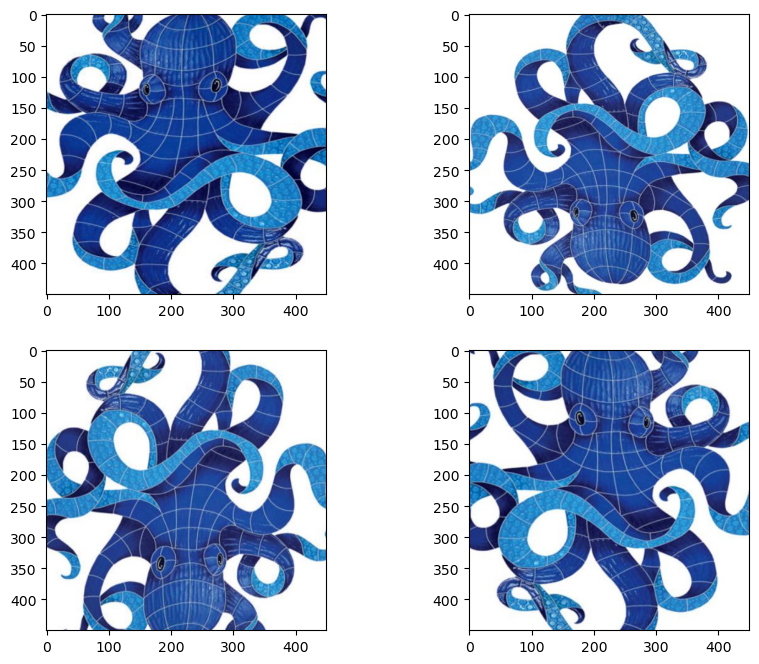

In [35]:
# Captura de imagem e tamanho:
fig = pypt.gcf();
fig.set_size_inches(10, 8);

linhas, colunas = 2, 2;

# Listando o diretório:
arquivos_imagens_augmentadas = os.listdir(r'C:\Users\lucas\Documents\augmented');

# Deleta items que não sejam .jpg:
# arquivos_imagens_augmentadas.remove('.ipynb_checkpoints');

# Descrição do plot:
print(f'Imagens a serem plotadas: {arquivos_imagens_augmentadas[0:4]}.\n');

aux = 1;

while aux <= 4:
    # Imagem:
    imagem = pycv.imread(f'C:\\Users\\lucas\\Documents\\augmented\\{arquivos_imagens_augmentadas[aux-1]}');

    # Subplots:
    pypt.subplot(linhas, colunas, aux);
    pypt.imshow(pycv.cvtColor(imagem, pycv.COLOR_BGR2RGB));
    # fig.tight_layout(pad = 0.5);
    pypt.axis('on');
    # pypt.title("Título da Figura");
    
    aux += 1;

# Plotando:
pypt.show();